# Project:TPS August 2022 Imputation

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#imp">Missing Values Imputation</a></li>
</ul>

### importing libraries that will be used to investigate Dataset

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_colwidth = 250
pd.options.display.max_columns = 50
import missingno as msno


<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Data Gathering 

In [2]:
# loading CSV files in to 3 Dataframes  //df, df_test and sub//

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [3]:
#checking 5 rows sample from Dataframes

df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [4]:
df_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [5]:
sub.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0


### Data Assessing 

In [6]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [7]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

In [8]:
#checking Dataframe shape (number of rows and columns)
df.shape, df_test.shape

((26570, 26), (20775, 25))

In [9]:
#checking more information and descriptive statistics

df.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [10]:
df.describe(include="O")

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


In [11]:
df_test.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20775.000000,20552.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20446.000000,20366.000000,20267.000000,20151.000000,20055.000000,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
mean,36957.000000,127.634895,7.733959,6.196823,7.453574,8.962407,6.126931,17.793466,11.727331,17.138080,17.515797,11.710919,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,5997.370257,39.154642,1.308535,1.917478,4.274477,4.334200,3.835881,1.002206,1.006834,1.008714,1.000067,1.001096,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,26570.000000,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,13.539000,7.853000,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,31763.500000,99.470000,6.000000,4.000000,4.000000,6.000000,3.000000,17.119000,11.048250,16.457000,16.847000,11.035000,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,36957.000000,122.110000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.729000,17.132000,17.510000,11.704000,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,42150.500000,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.478000,12.411000,17.824500,18.197000,12.385000,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500
max,47344.000000,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,21.183000,15.828000,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


In [12]:
df_test.describe(include="O")

,product_code,attribute_0,attribute_1
count,20775,20775,20775
unique,4,2,3
top,F,material_5,material_6
freq,5422,10529,10529


In [13]:
# checking for NaN values in df

df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [14]:
# checking for NaN values in df_test

df_test.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [15]:
# check total NaN values in both train and test datasets

df.isnull().sum().sum(),df_test.isnull().sum().sum() 

(20273, 15709)

In [16]:
#checking for duplicated rows 

df.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

In [18]:
#checking number of unique values

df.nunique()

id                26570
product_code          5
loading           11950
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
measurement_0        29
measurement_1        30
measurement_2        25
measurement_3      4721
measurement_4      4692
measurement_5      4671
measurement_6      4704
measurement_7      4734
measurement_8      4713
measurement_9      4708
measurement_10     6177
measurement_11     6526
measurement_12     6392
measurement_13     5271
measurement_14     6389
measurement_15     6577
measurement_16     7035
measurement_17    23612
failure               2
dtype: int64

In [19]:
df_test.nunique()

id                20775
product_code          4
loading           10741
attribute_0           2
attribute_1           3
attribute_2           3
attribute_3           4
measurement_0        30
measurement_1        33
measurement_2        28
measurement_3      4487
measurement_4      4514
measurement_5      4500
measurement_6      4476
measurement_7      4493
measurement_8      4513
measurement_9      4471
measurement_10     6217
measurement_11     6252
measurement_12     5623
measurement_13     5644
measurement_14     5795
measurement_15     6156
measurement_16     6396
measurement_17    18657
dtype: int64

## Check failure percentage

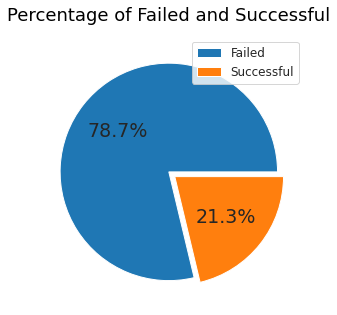

In [26]:
fig = plt.subplots(figsize=(16,5))
plt.pie(df.failure.value_counts(normalize=True), autopct='%1.1f%%', textprops={'fontsize': 19},explode = (0, 0.07,))
plt.rcParams['font.size'] = 12

plt.title("Percentage of Failed and Successful",fontsize=18, pad=15, color="k")
plt.legend(fontsize=12, labels=[ "Failed","Successful"]);

**Clearly 21.3 % only from products succeeded**

<a id='imp'></a>

## <font color='blue'>Missing Values Imputation</font>

### 1. Detect missing values

In [174]:
# select columns with nans


col_with_nans = [i for i in df.columns.values if df[i].isna().sum()>0]

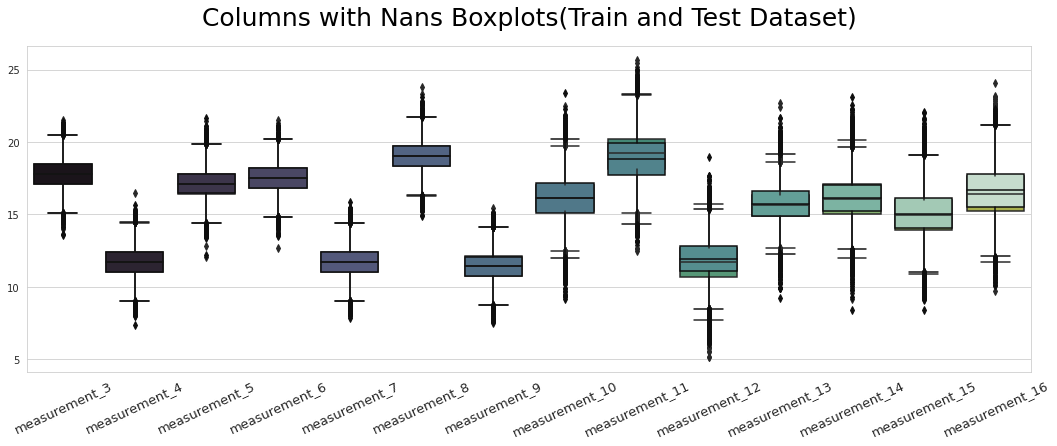

In [175]:
co_box = [i for i in col_with_nans if i not in ("loading", "measurement_17")]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[co_box],saturation=.5, palette="viridis")
sns.boxplot(data=df_test[co_box],saturation=.5, palette="mako")
plt.title("Columns with Nans Boxplots(Train and Test Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13, rotation=25);

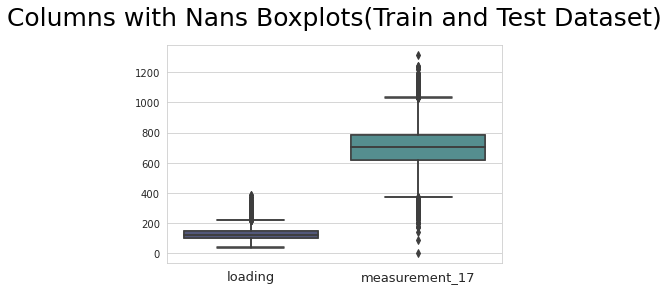

In [176]:
co_box = ["loading", "measurement_17"]
fig = plt.figure()
sns.boxplot(data=df[co_box],saturation=.5, palette="viridis")
sns.boxplot(data=df_test[co_box],saturation=.5, palette="mako")
plt.title("Columns with Nans Boxplots(Train and Test Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

In [29]:
 100* df.isnull().sum() / len(df)

id                0.000000
product_code      0.000000
loading           0.940911
attribute_0       0.000000
attribute_1       0.000000
attribute_2       0.000000
attribute_3       0.000000
measurement_0     0.000000
measurement_1     0.000000
measurement_2     0.000000
measurement_3     1.433948
measurement_4     2.024840
measurement_5     2.544223
measurement_6     2.995860
measurement_7     3.526534
measurement_8     3.944298
measurement_9     4.617990
measurement_10    4.892736
measurement_11    5.525028
measurement_12    6.025593
measurement_13    6.676703
measurement_14    7.053067
measurement_15    7.561159
measurement_16    7.941287
measurement_17    8.596161
failure           0.000000
dtype: float64

### 1st method

In [101]:
def missing_values_table(df , name =  ""):
    """ This function is to detect missing values from dataframe and calculate them

    Args:
        df (dataframe): pandas dataframe

    Returns:
        dataframe: sorted data frame Ascending or descending that includes outliers of selected column.
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : name + ' Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print (name + " Dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [102]:
train_nans = missing_values_table(df, "Train")
test_nans = missing_values_table(df_test, "Test")
pd.concat([train_nans, test_nans], axis=1)

Train Dataframe has 26 columns.
There are 16 columns that have missing values.
Test Dataframe has 25 columns.
There are 16 columns that have missing values.


,Train Missing Values,% of Total Values,Test Missing Values,% of Total Values
measurement_17,2284,8.6,1740,8.4
measurement_16,2110,7.9,1678,8.1
measurement_15,2009,7.6,1542,7.4
measurement_14,1874,7.1,1440,6.9
measurement_13,1774,6.7,1303,6.3
measurement_12,1601,6.0,1240,6.0
measurement_11,1468,5.5,1136,5.5
measurement_10,1300,4.9,1067,5.1
measurement_9,1227,4.6,904,4.4
measurement_8,1048,3.9,846,4.1


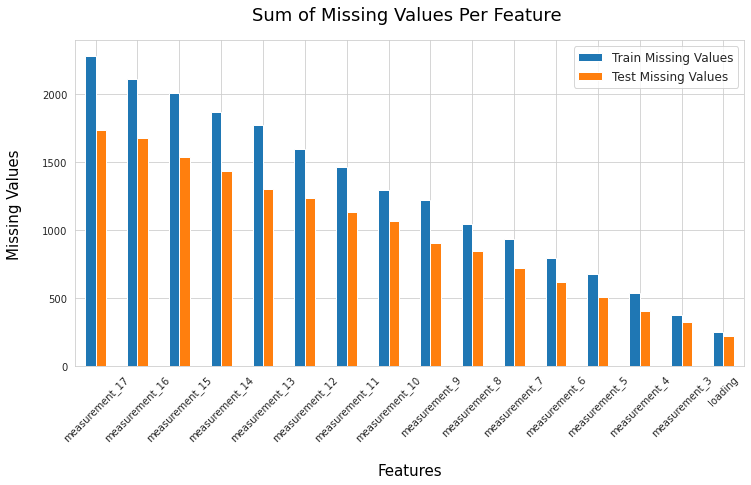

In [104]:
pd.concat([train_nans, test_nans], axis=1)[
    ["Train Missing Values", "Test Missing Values"]].plot(kind="bar",
                                                    figsize=(12,6),
                                                         rot=45)
plt.ylabel("Missing Values",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Features",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("Sum of Missing Values Per Feature ", fontsize=18, color="k", pad=20)
plt.legend(fontsize=12);

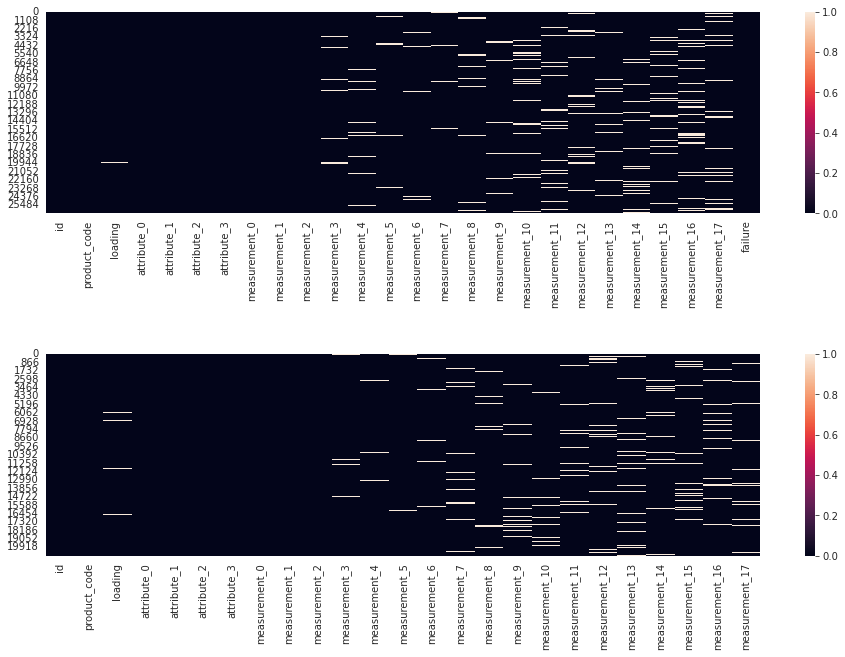

In [177]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
sns.heatmap(df.isna(), ax=ax[0])
sns.heatmap(df_test.isna(), ax=ax[1])
plt.subplots_adjust(hspace = 0.7);

### 2nd method

**we need to import it as follows: import missingno as msno**

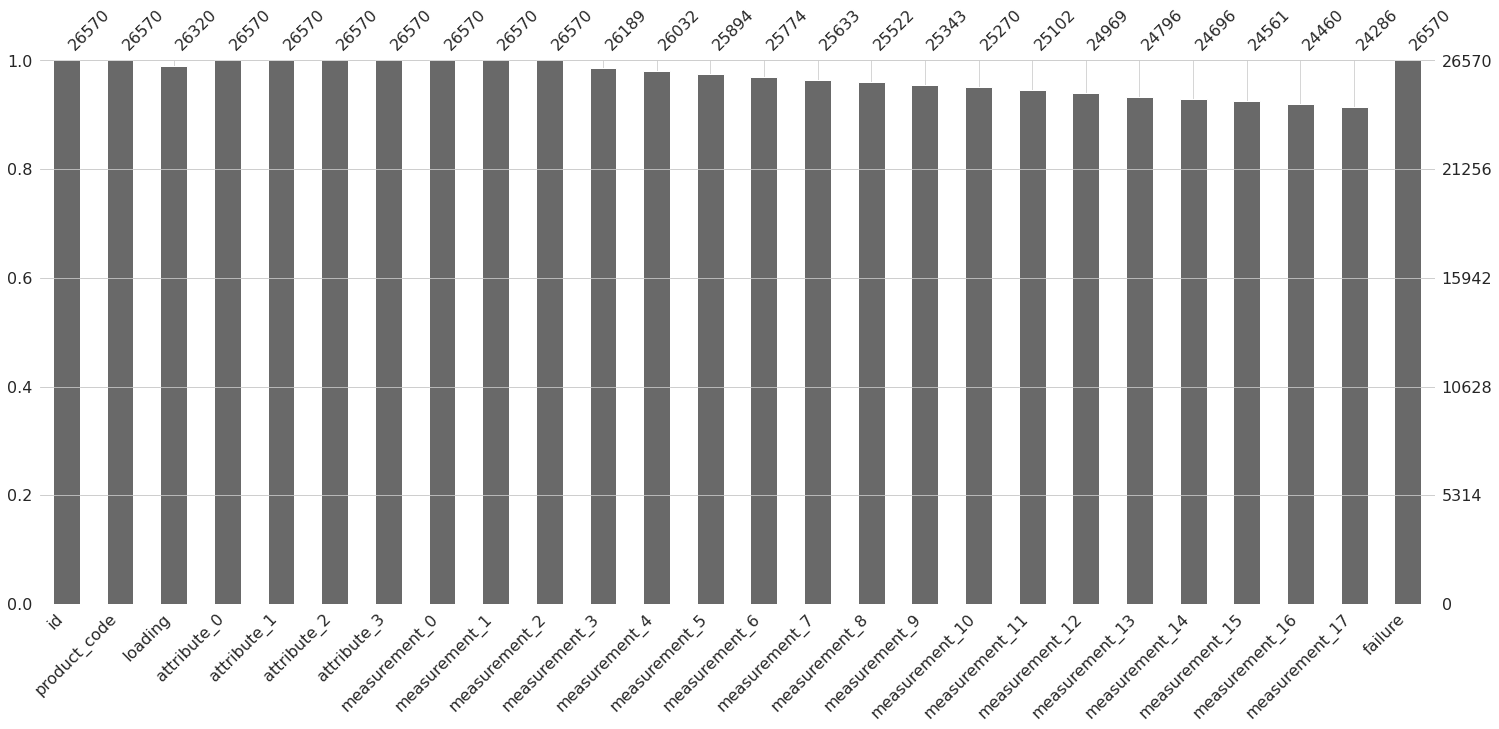

In [156]:
msno.bar(df);

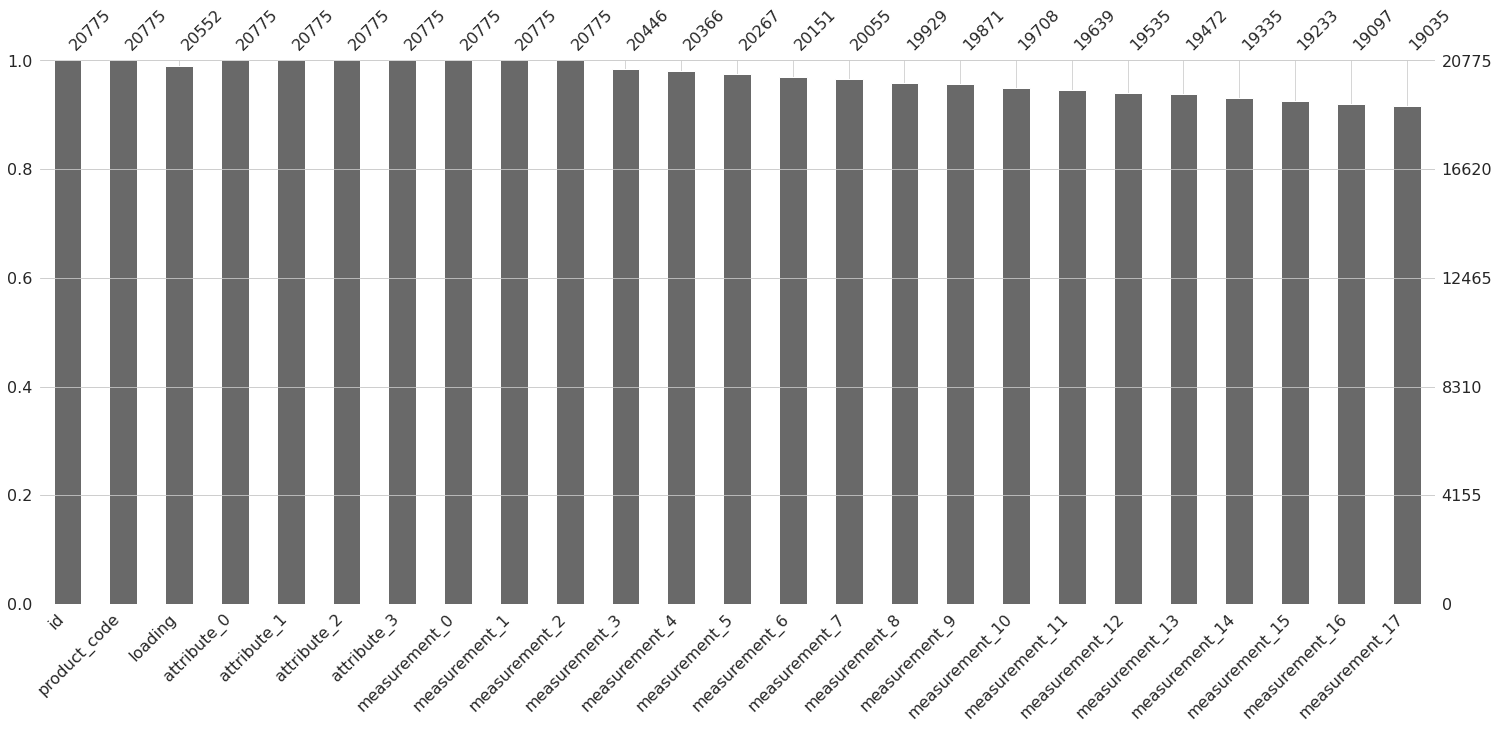

In [157]:
msno.bar(df_test);

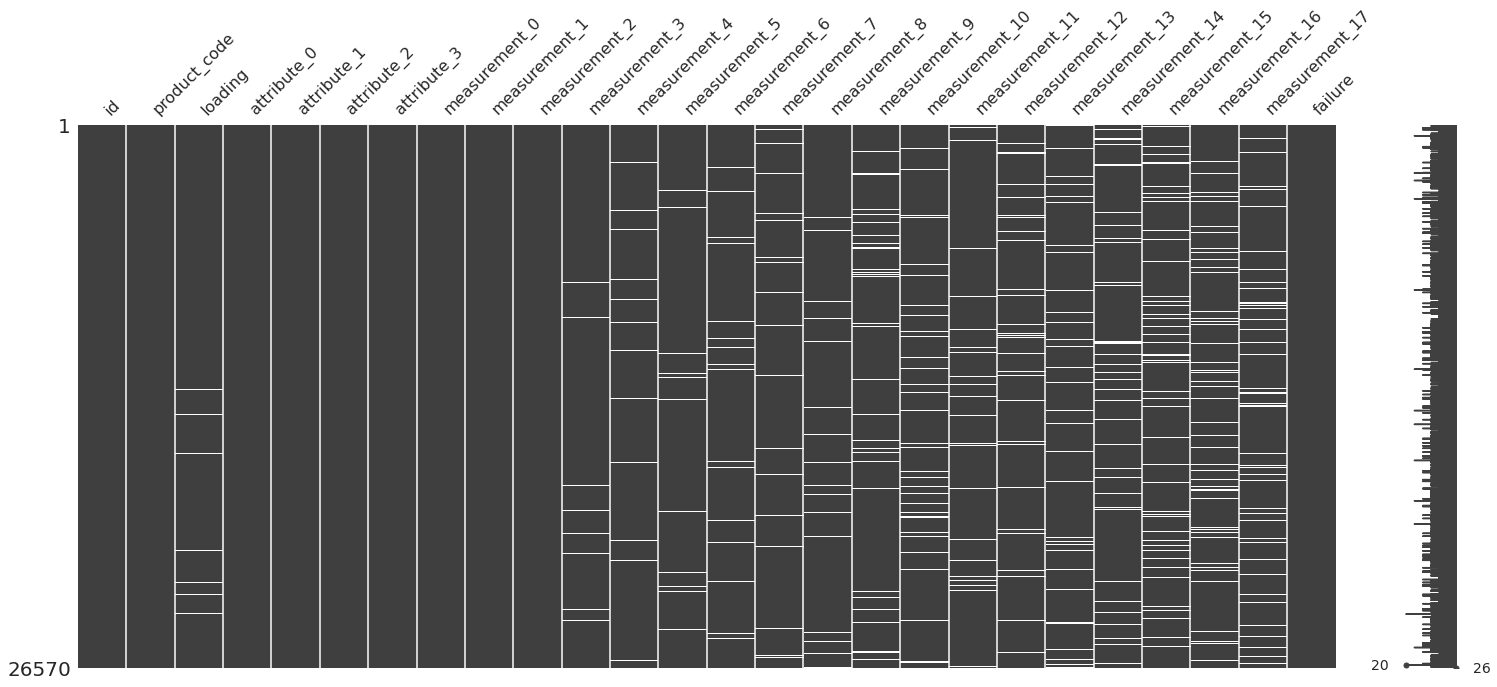

In [160]:
msno.matrix(df);

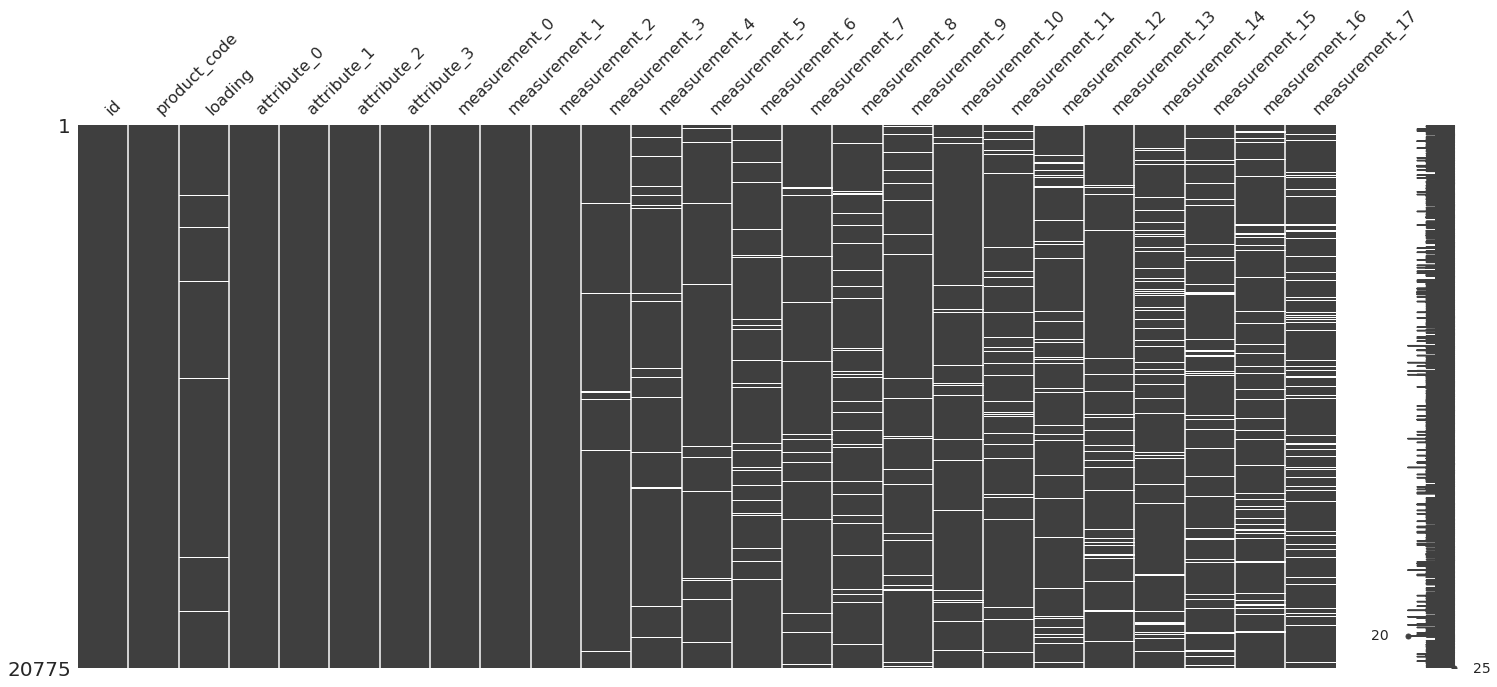

In [162]:
msno.matrix(df_test);

### 2. define reason for missing values

<AxesSubplot:>

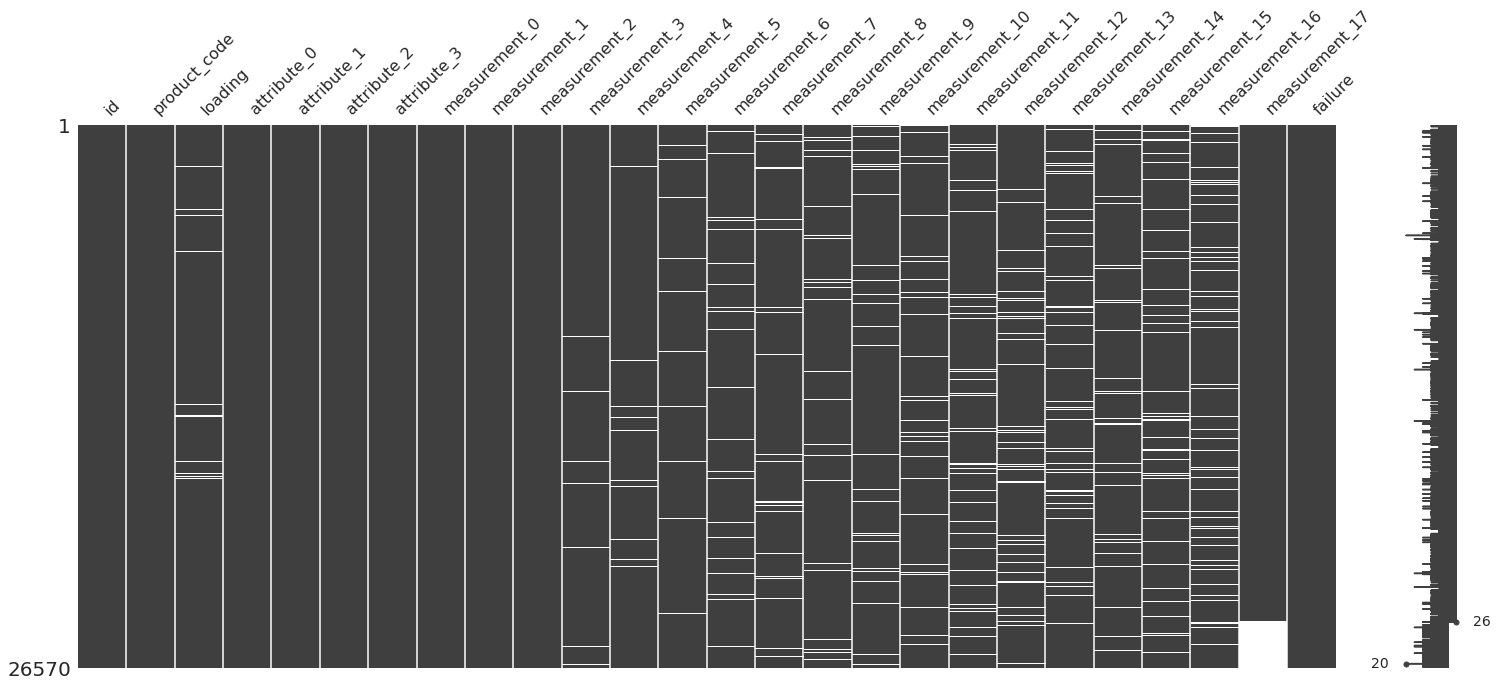

In [165]:
# We will sort spesific column and check if the missing values on the other columns will sort as well or not

sorted = df.sort_values('measurement_17')
msno.matrix(sorted)

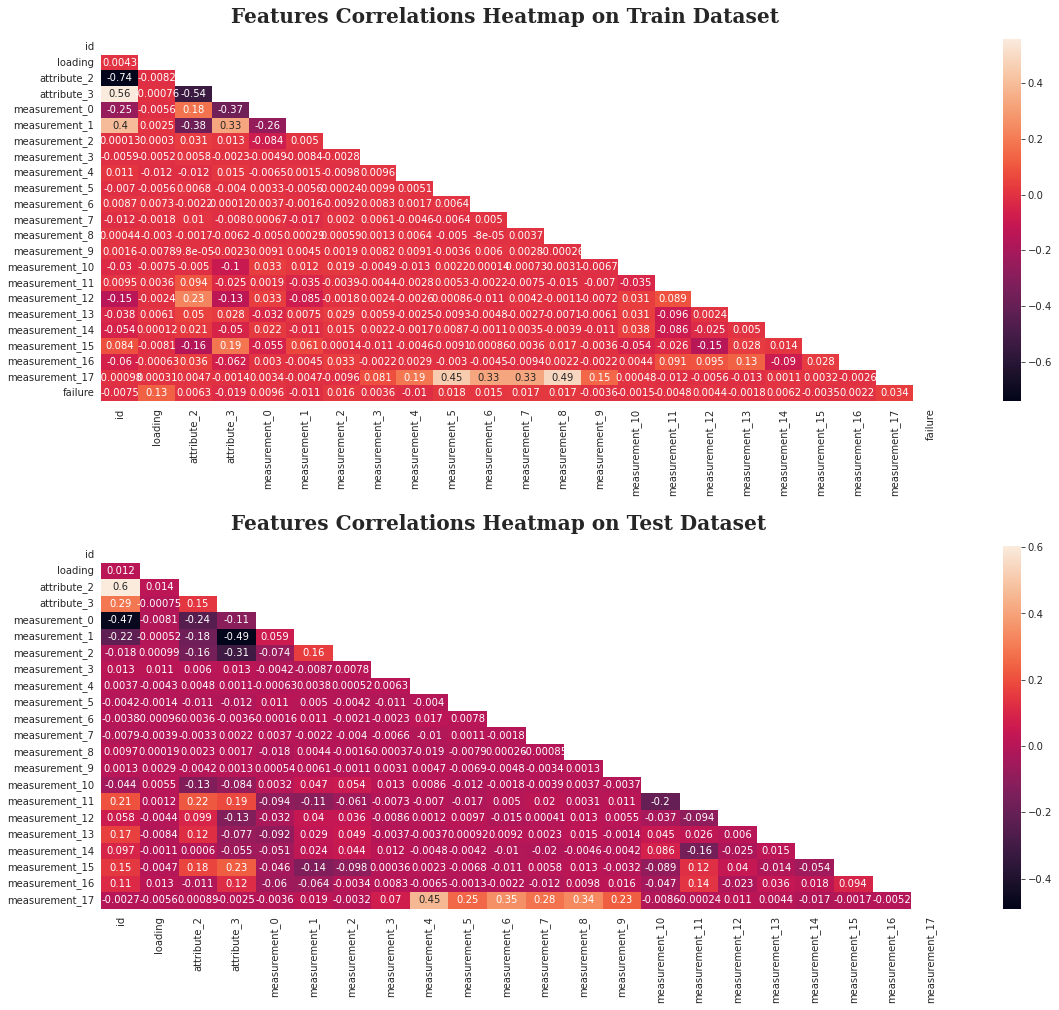

In [170]:
## Use correlation metrix

fig,ax = plt.subplots(2,1, figsize=(19,16))
df
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, ax=ax[0], annot=True, mask=mask)

corr_matrix = df_test.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, ax=ax[1], annot=True , mask=mask)

#sns.heatmap(df_test[count].corr(),ax=ax[1], annot=True)
#ax[0].set_xticklabels(quantitative + ["failure"], rotation=25)
#ax[1].set_xticklabels(quantitative, rotation=25)
ax[0].text(-0.1, -1, '                   Features Correlations Heatmap on Train Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
ax[1].text(-0.1, -1, '                   Features Correlations Heatmap on Test Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(hspace = 0.4, wspace=0.4);

### 3. Imputation

### A. K-Nearest Neighbor Imputation

In [184]:
%%time

from sklearn.impute import KNNImputer
df_knn = df.copy(deep=True)
df_test_knn = df_test.copy(deep=True)


knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

df_knn[col_with_nans] = knn_imputer.fit_transform(df_knn[col_with_nans])
df_test_knn[col_with_nans] = knn_imputer.fit_transform(df_test_knn[col_with_nans])

CPU times: user 47.2 s, sys: 6.86 s, total: 54.1 s
Wall time: 35.2 s


In [185]:
df_knn.isna().sum().sum(), df_test_knn.isna().sum().sum()

(0, 0)

### B.Multivariate feature imputation - Multivariate imputation by chained equations (MICE)

In [186]:
%%time

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice = df.copy(deep=True)
df_test_mice = df_test.copy(deep=True)


mice_imputer = IterativeImputer()

df_mice[col_with_nans] = mice_imputer.fit_transform(df_mice[col_with_nans])
df_test_mice[col_with_nans] = mice_imputer.fit_transform(df_test_mice[col_with_nans])

CPU times: user 8.41 s, sys: 64.3 ms, total: 8.47 s
Wall time: 2.15 s


In [187]:
df_mice.isna().sum().sum(), df_test_mice.isna().sum().sum()

(0, 0)

## Replace with constant (Mean, median, mode)

In [242]:
# Fill Empty values with median

for i in col_with_nans:
    for char in [k for k in df.product_code.value_counts().index]:
        m = df.product_code == char
        df.loc[m, i] = df.loc[m, i].fillna(df.loc[m, i].median())
        
    for char in [k for k in df_test.product_code.value_counts().index]:
        m2 = df_test.product_code == char
        df_test.loc[m2, i] = df_test.loc[m2, i].fillna( df_test.loc[m2, i].median())

In [243]:
df.isna().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [87]:
# Fill Empty values with median

for i in col_with_nans:
    df[i].fillna(df[i].median(), inplace=True)
    df_test[i].fillna(df_test[i].median(), inplace=True)

In [127]:
# Confirm changes 

df.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)